In [1]:
#importing necessaries libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the data file 
data=pd.read_csv('../Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#here few misconceptions are there like BMI cant be 0 ,bloodPressure cant be 0 ,also glucose ,insulin cant be 0
#  now replacing all zeroes with mean of the column

data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())



In [6]:
data.describe()
#all minimum values that were 0 got removed 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

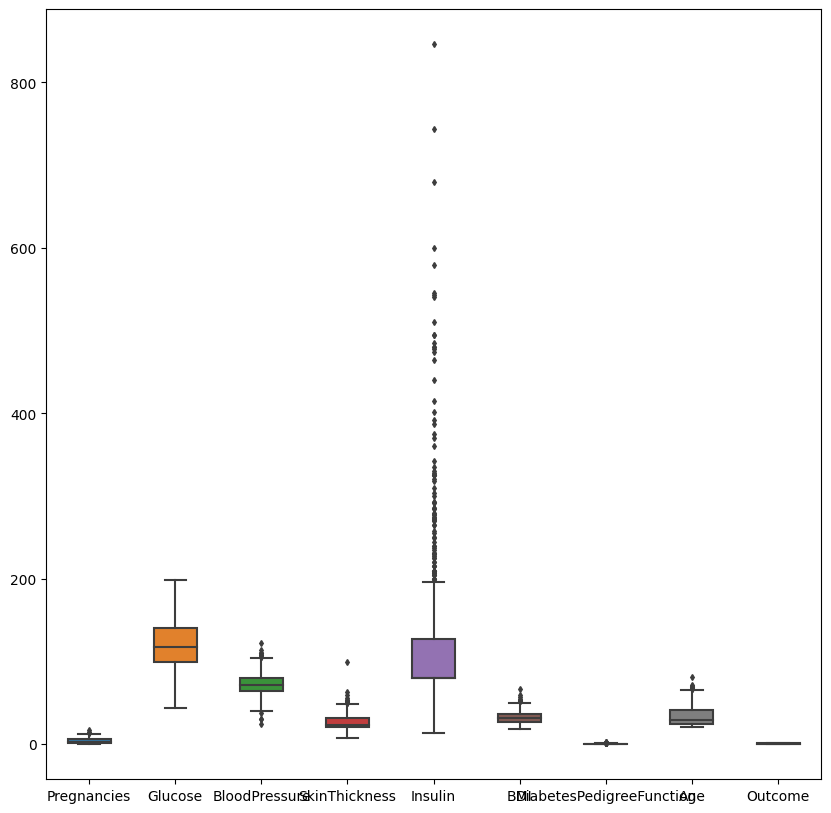

In [8]:
#to visulatise the outliers draw box plot of the data
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


# segregate the dependent and independent variable for the train test split

In [10]:
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [11]:
#separate the dataset into training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

# now we can use the standard scaler to standarise the data

In [12]:
import pickle

def scaler_standard(X_train,X_test):
    #scale the data
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    #saving the model 
    file=open('../Model/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled,X_test_scaled


In [13]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [14]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

# implementing decision tree with hyper parameter tuning 

In [15]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()

In [17]:
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.765 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.643 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.617 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, splitter=best;, score=0.664 total time=   0.0s
[CV 2/5] END crite

[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.609 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.643 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.687 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.696 total time=   0.0s
[

[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.678 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.713 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.690 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.757 total time=   0.

[CV 5/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=best;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=2, max_features=log2, splitter=random;, score=0.643 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total t

[CV 1/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.670 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.626 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.687 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.713 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=0.678 t

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [18]:
#best parameters found
clf.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [19]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=None,splitter='random')

In [20]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

# lets see how our model performs on test data set


In [21]:
y_pred=classifier.predict(X_test_scaled)

In [22]:
print(accuracy_score(y_test,y_pred))

0.6770833333333334


In [23]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [24]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [25]:
#checking accuracy
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6770833333333334

In [26]:
#find the precision
precision=true_positive/(true_positive+false_positive)
precision

1.0

In [27]:
#check recall
Recall=true_positive/(true_positive+false_negative)
Recall


0.6770833333333334

In [28]:
F1_score=2*(Recall*precision)/(Recall+precision)
F1_score

0.8074534161490683

# dumping the decision tree model in the same file that was for logistic regression

In [29]:
import pickle
file=open('../Model/modelforprediction.pkl','wb')
pickle.dump(classifier,file)
file.close()

# now we will build the model for svm classifier with hyperparameter tuning 

In [30]:
# defining the paramters 
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf','polynomial']
}

In [31]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.2s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.2s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.740 total time=   2.9s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.771 total time=  10.3s
[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.776 total time=   5.6s
[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.740 total time=   2.9s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ......C=10, gam

[CV 1/3] END C=1000, gamma=0.001, kernel=linear;, score=0.750 total time=  37.0s
[CV 2/3] END C=1000, gamma=0.001, kernel=linear;, score=0.781 total time=  24.3s
[CV 3/3] END C=1000, gamma=0.001, kernel=linear;, score=0.708 total time=  28.8s
[CV 1/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.635 total time=   0.0s
[CV 2/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.589 total time=   0.0s
[CV 3/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/3] END C=1000, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END C=1000, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END C=1000, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END C=1000, gamma=0.0001, kernel=linear;, score=0.750 total time=  36.4s
[CV 2/3] END C=1000, gamma=0.0001, kernel=linear;, score=0.781 total time=  24.6s
[CV 3/3] END C=1000, gamma=0.0001, kernel=linear;, score=0.708 total time=  29.0s
[CV 1/3] END ..C=10

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [32]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [33]:
svc_clf=SVC(C=0.1,gamma=1,kernel='linear')

In [34]:
svc_clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [35]:
#svc prediction
y_pred_svc=svc_clf.predict(X_test_scaled)

In [36]:
#check all accuracy score,confusion matrix 
conf_svc=confusion_matrix(y_test,y_pred_svc)
conf_svc

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [37]:
true_positive=conf_svc[0][0]
false_positive=conf_svc[0][1]
false_negative=conf_svc[1][0]
true_negative=conf_svc[1][1]

In [38]:
#checking accuracy
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.6770833333333334